In [606]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LinearRegression
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_squared_error

In [607]:
# Se importa el dataset
dataFrame = pd.read_csv("/content/californiaHousingHPC.csv", sep =',')
dataFrame.shape

(17000, 9)

In [608]:
dataFrame.head()

,median_house_value,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,66900.0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,80100.0,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,85700.0,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,73400.0,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,65500.0,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250


In [609]:
#se imprime el nombre de las columnas
dataFrame.columns

Index(['median_house_value', 'longitude', 'latitude', 'housing_median_age',
       'total_rooms', 'total_bedrooms', 'population', 'households',
       'median_income'],
      dtype='object')

**Identificacion de las variables:**

longitude : Ubicación Longitud

latitude  : Ubicación Latitud

housing_median_age : Edad promedio de la casa

total_rooms:  Número total de habitaciones en una cuadra

total_bedrooms: Número total de habitaciones dentro de una cuadra

population: Número total de personas que residen en una cuadra

households: 	Número total de hogares, grupo de personas que residen dentro de una unidad doméstica, para una cuadra

median_income: Mediana de los ingresos de los hogares de una cuadra de viviendas (medidos en decenas de miles de dólares)

median_house_value: 	Valor medio de la vivienda de los hogares de una manzana (medido en dólares estadounidenses)


In [639]:
dataFrame['median_income'] = dataFrame['median_income'] * 1000
dataFrame

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1493.6,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1820.0,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1650.9,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3191.7,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1925.0,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2357.1,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2517.9,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3031.3,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1979.7,85800.0


In [611]:
#EDA del dataset
#1. informacion completa del dataset
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   median_house_value  17000 non-null  float64
 1   longitude           17000 non-null  float64
 2   latitude            16999 non-null  float64
 3   housing_median_age  16998 non-null  float64
 4   total_rooms         16998 non-null  float64
 5   total_bedrooms      16999 non-null  float64
 6   population          17000 non-null  float64
 7   households          17000 non-null  float64
 8   median_income       17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


A partir de la tabla de informacion del dataframe (tabla anterior) se toma la decision de eliminar los datos nulos de las variables independientes

In [612]:
dataFrame = dataFrame.dropna()
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16996 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   median_house_value  16996 non-null  float64
 1   longitude           16996 non-null  float64
 2   latitude            16996 non-null  float64
 3   housing_median_age  16996 non-null  float64
 4   total_rooms         16996 non-null  float64
 5   total_bedrooms      16996 non-null  float64
 6   population          16996 non-null  float64
 7   households          16996 non-null  float64
 8   median_income       16996 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB


In [613]:
dataFrame = dataFrame.reindex(columns=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value'])

In [614]:
dataFrame.to_csv('californiaHousingHPC2.csv', encoding='utf-8')

In [615]:
dataFrame.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [616]:
# Se presenta resumen estadistico de los datos
dataFrame.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16996.000000,16996.000000,16996.000000,16996.000000,16996.000000,16996.000000,16996.000000,16996.000000,16996.000000
mean,-119.563018,35.625783,28.592257,2643.507472,539.360202,1429.522299,501.195811,3.883778,207334.844081
std,2.004522,2.137265,12.586231,2179.265844,421.299896,1147.685508,384.411962,1.908228,115976.220164
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566700,119475.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.545050,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Text(0.5, 1.0, 'population')

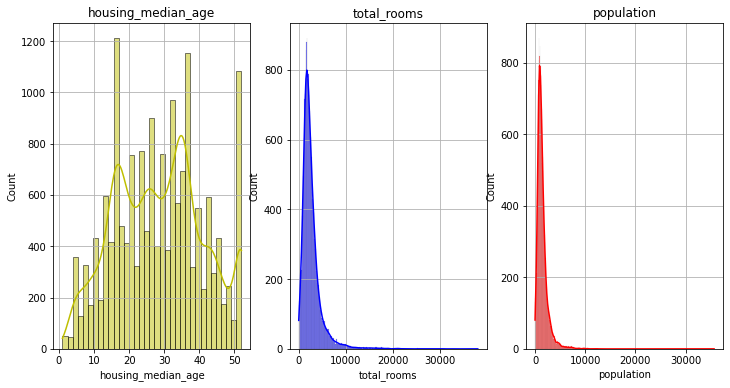

In [617]:
# Se grafica la distribucion de la variable 
fig, axes=plt.subplots(1,3,figsize=(12,6))
axes[0].grid()
axes[1].grid()
axes[2].grid()

sns.histplot(dataFrame['housing_median_age'], ax=axes[0], kde=True, color="y")
axes[0].set_title('housing_median_age')
sns.histplot(dataFrame['total_rooms'], ax=axes[1], kde=True, color="b")
axes[1].set_title('total_rooms')
sns.histplot(dataFrame['population'], ax=axes[2], kde=True, color="r")
axes[2].set_title('population')


Text(0.5, 1.0, 'median_house_value')

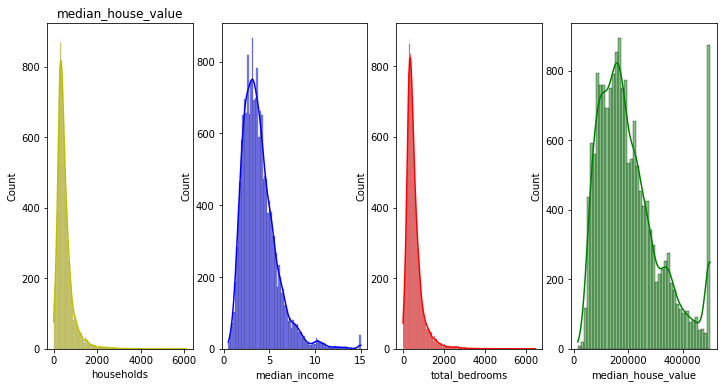

In [618]:
fig, axes=plt.subplots(1,4,figsize=(12,6))

sns.histplot(dataFrame['households'], ax=axes[0], kde=True, color="y")
axes[0].set_title('households')
sns.histplot(dataFrame['median_income'], ax=axes[1], kde=True, color="b")
axes[0].set_title('median_income')
sns.histplot(dataFrame['total_bedrooms'], ax=axes[2], kde=True, color="r")
axes[0].set_title('total_bedrooms')
sns.histplot(dataFrame['median_house_value'], kde=True, color="g")
axes[0].set_title('median_house_value')


Con base en la grafica anterior podemos concluir que la mayor cantidad de casas tienen entre 30 y 40 años de antiguedad, y que las casas mas antiguas tiene hasta 52 años

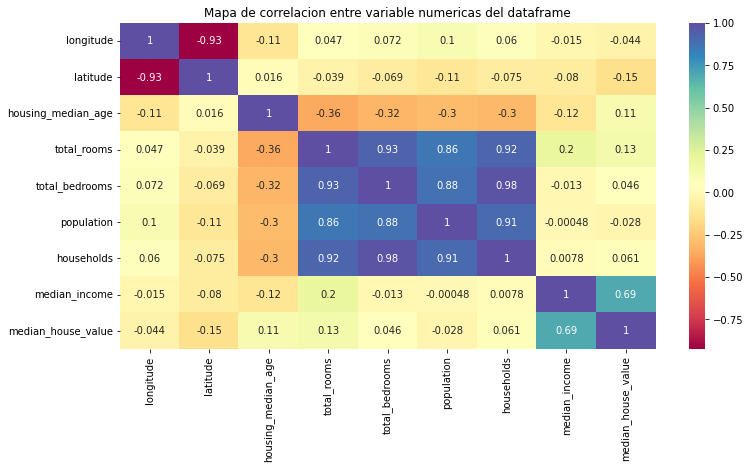

In [619]:
mathCorre = dataFrame.corr()
plt.figure(figsize=(12,6)) 
sns.heatmap(mathCorre, annot=True, cmap='Spectral')
plt.title('Mapa de correlacion entre variable numericas del dataframe')
plt.show()

In [620]:
# A continuacion se separa las variables dependientes de las varialbes independientes 
X = dataFrame.drop(['median_house_value'], axis=1)
y = dataFrame['median_house_value']

In [621]:
# Se hacen los grupos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=False)

In [622]:
# A continuacion se hace un pipeline para entrenar el modelo usando la normalizacion z (similar a lo elaborado en c++)
pipe = Pipeline([('scaler', StandardScaler()),('LR', LinearRegression())])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('LR', LinearRegression())])

In [623]:
# Variable de prediccion de prueba por sklearn
y_hat_test_sk = pipe.predict(X_test)

In [624]:
# Variable de prediccion de entrenamiento por sklearn
y_hat_train_sk = pipe.predict(X_train)

In [625]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_hat_test_sk})

,Actual,Predicted
13600,204100.0,192585.927354
13601,126700.0,199574.979331
13602,265900.0,292477.438541
13603,267400.0,277947.286809
13604,351300.0,352347.055703
...,...,...
16995,111400.0,153656.523820
16996,79000.0,147957.448201
16997,103600.0,99380.815531
16998,85800.0,62351.105546


In [626]:
pipe.score(X_test, y_test)

0.6556193950554592

In [627]:
pipe.score(X_train, y_train)

0.6202294643662776

In [628]:
regr = LinearRegression()
regr.fit(X_train, y_train)
print('Coeficientes: \n', regr.coef_)
print('Corte eje Y: \n', regr.intercept_)
print("Error cuadratico medio: %.2f" % mean_squared_error(y_train, y_hat_train_sk))

Coeficientes: 
 [-4.01598995e+04 -4.09906075e+04  9.81707925e+02 -8.38072087e+00
  1.17868267e+02 -3.56089213e+01  3.36467028e+01  3.99079812e+04]
Corte eje Y: 
 -3326308.0263481466
Error cuadratico medio: 4655835338.14


In [629]:
r2_score(y_train, y_hat_train_sk)

0.6202294643662776

In [630]:
r2_score(y_test, y_hat_test_sk)

0.6556193950554592

In [631]:
promedio = open('promedio.txt')
prom = promedio.read().split(sep='\n')

In [632]:
pd.DataFrame({'C ++': prom, 'SkLearn': dataFrame.mean()})

,C ++,SkLearn
longitude,-119.556,-119.563018
latitude,35.6237,35.625783
housing_median_age,28.5906,28.592257
total_rooms,2643.35,2643.507472
total_bedrooms,539.328,539.360202
population,1429.44,1429.522299
households,501.166,501.195811
median_income,3883.55,3.883778
median_house_value,207323,207334.844081


In [633]:
# Se pinta la funcion de costo del modelo artesanal
costo = pd.read_csv("/content/VectorCosto.txt", header = None)

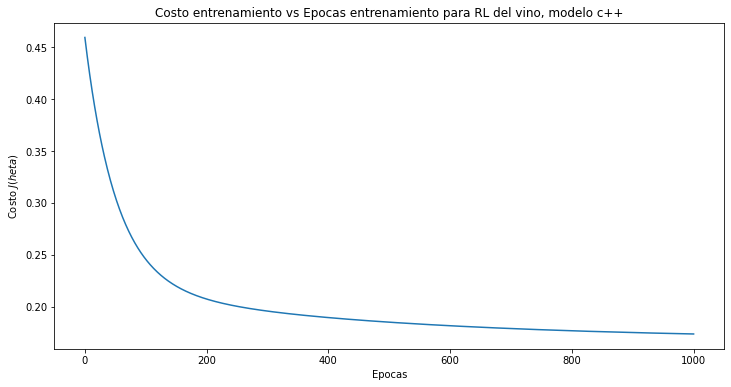

In [634]:
# A continuacion se grafica la funcion de costo de nuestro modelo artesanal C++
fig, axes = plt.subplots(figsize=(12,6))
axes.plot(costo)
axes.set_title('Costo entrenamiento vs Epocas entrenamiento para RL del vino, modelo c++')
axes.set_xlabel('Epocas')
axes.set_ylabel('Costo $J(\theta)$')
plt.show()

In [635]:
y_hat = pd.read_csv("/content/y_train_hat.txt", header = None)
y_hat = y_hat.drop(13597, axis=0)
y_hat = y_hat.drop(13596, axis=0)

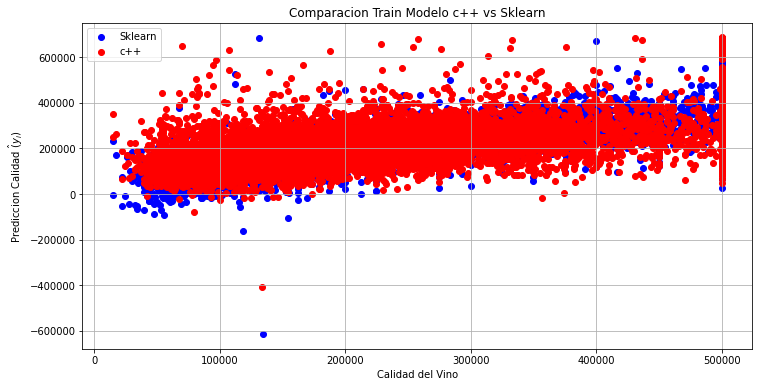

In [636]:
# Se compara modelo en c++ vs python SKlearn
fig, axes = plt.subplots(figsize=(12,6))

plt.scatter(y_train, y_hat_train_sk, c='b', label='Sklearn')
plt.scatter(y_train, y_hat, c='r', label='c++')
axes.set_title('Comparacion Train Modelo c++ vs Sklearn')
axes.set_xlabel('Calidad del Vino')
axes.set_ylabel('Prediccion Calidad $\hat(y_i)$')
plt.legend(loc=2)
plt.grid()
plt.show()

In [637]:
y_hat_test = pd.read_csv("/content/y_test_hat.txt", header = None)
y_hat_test.loc[3399]=[0]

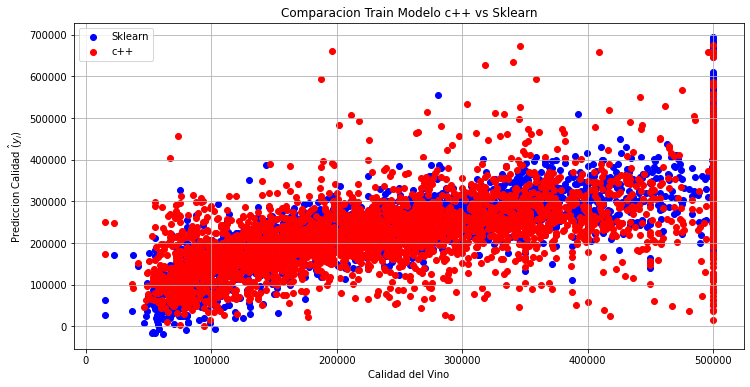

In [638]:
# Se compara modelo en c++ vs python SKlearn
fig, axes = plt.subplots(figsize=(12,6))

plt.scatter(y_test, y_hat_test_sk, c='b', label='Sklearn')
plt.scatter(y_test, y_hat_test, c='r', label='c++')
axes.set_title('Comparacion Train Modelo c++ vs Sklearn')
axes.set_xlabel('Calidad del Vino')
axes.set_ylabel('Prediccion Calidad $\hat(y_i)$')
plt.legend(loc=2)
plt.grid()
plt.show()